# TimeSeries Analysis and Plotting

Daru allows for a host of functions for analyzing and visualizing time series data. In this notebook we'll go over a few with examples.

For details on using statistical analysis functions offered by daru see [this blog post]().

In [1]:
require 'distribution'
require 'daru'
require 'gnuplotrb'

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"http://d3js.org/d3.v3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    window.dispatchEvent(event);\n\t

true

In [2]:
rng = Distribution::Normal.rng

index  = Daru::DateTimeIndex.date_range(:start => '2012-4-2', :periods => 1000, :freq => 'D')
vector = Daru::Vector.new(1000.times.map {rng.call}, index: index)

#<Daru::Vector:89556300 @name = nil @size = 1000 >
                                      nil
2012-04-02T00:00:00+   0.9679512581213839
2012-04-03T00:00:00+ 0.022459748645852044
2012-04-04T00:00:00+  -0.6274818246927284
2012-04-05T00:00:00+  -0.3967321369721622
2012-04-06T00:00:00+  -0.3640815613462954
2012-04-07T00:00:00+  -0.2655176999615409
2012-04-08T00:00:00+  0.45448990105777315
2012-04-09T00:00:00+   -1.455655143209679
2012-04-10T00:00:00+ -0.09323505444387158
2012-04-11T00:00:00+  -0.6752958700462365
2012-04-12T00:00:00+   0.6619095714438166
2012-04-13T00:00:00+ -0.19145774779908523
2012-04-14T00:00:00+  -0.6263870072028367
2012-04-15T00:00:00+   0.5536198902207046
2012-04-16T00:00:00+    1.196208119637418
2012-04-17T00:00:00+    1.628417216135157
2012-04-18T00:00:00+  -1.0560283956421732
                 ...                  ...

In [3]:
vector = vector.cumsum

#<Daru::Vector:83472220 @name = nil @size = 1000 >
                                      nil
2012-04-02T00:00:00+   0.9679512581213839
2012-04-03T00:00:00+    0.990411006767236
2012-04-04T00:00:00+  0.36292918207450764
2012-04-05T00:00:00+ -0.03380295489765456
2012-04-06T00:00:00+ -0.39788451624394994
2012-04-07T00:00:00+  -0.6634022162054909
2012-04-08T00:00:00+ -0.20891231514771774
2012-04-09T00:00:00+  -1.6645674583573966
2012-04-10T00:00:00+  -1.7578025128012682
2012-04-11T00:00:00+  -2.4330983828475046
2012-04-12T00:00:00+   -1.771188811403688
2012-04-13T00:00:00+  -1.9626465592027733
2012-04-14T00:00:00+    -2.58903356640561
2012-04-15T00:00:00+  -2.0354136761849055
2012-04-16T00:00:00+  -0.8392055565474876
2012-04-17T00:00:00+   0.7892116595876695
2012-04-18T00:00:00+ -0.26681673605450373
                 ...                  ...

Daru::Vector has a bunch of functions for performing useful statistical analysis of time series data. See this blog post for a comprehensive overview of the statistics functions available on Daru::Vector.

For example, you can calculate the rolling mean of a Vector with the `#rolling_mean` function and pass in the loopback length as the argument:

In [4]:
rolling = vector.rolling_mean 60
rolling.tail

#<Daru::Vector:89221690 @name = nil @size = 10 >
                                      nil
2014-12-18T00:00:00+   -48.63936545993331
2014-12-19T00:00:00+   -48.78082245412963
2014-12-20T00:00:00+   -48.94126415692764
2014-12-21T00:00:00+  -49.089789216908876
2014-12-22T00:00:00+   -49.23217144486508
2014-12-23T00:00:00+   -49.36591686347972
2014-12-24T00:00:00+    -49.4965672112104
2014-12-25T00:00:00+   -49.57885611565935
2014-12-26T00:00:00+    -49.6638742352537
2014-12-27T00:00:00+   -49.74601918836437

Using the [gnuplotRB gem](), it is also possible to directly plot the vector and its rolling mean as line plots on the same graph:

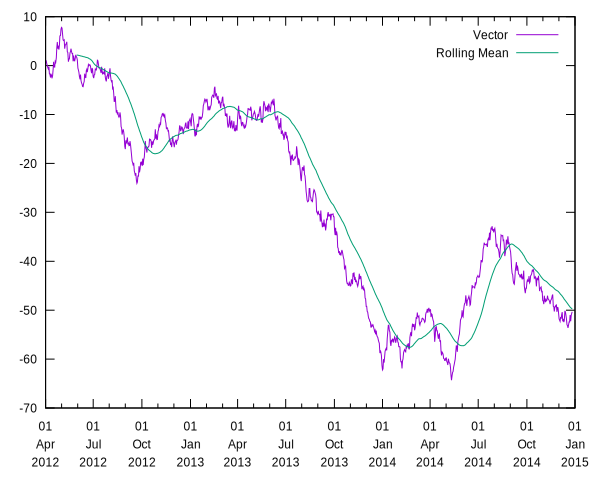

In [5]:
GnuplotRB::Plot.new([vector, with: 'lines', title: 'Vector'], [rolling, with: 'lines', title: 'Rolling Mean'])

In [6]:
df = Daru::DataFrame.new({
  a: 1000.times.map {rng.call}, 
  b: 1000.times.map {rng.call}, 
  c: 1000.times.map {rng.call}
}, index: index)

,a,b,c
2012-04-02T00:00:00+00:00,1.0616143453186424,2.3266221496435744,0.800149709055792
2012-04-03T00:00:00+00:00,0.12026688538504984,-1.4504577526844833,-1.5388358524911092
2012-04-04T00:00:00+00:00,0.25427284864154065,0.13889056199985192,-1.3185311292454616
2012-04-05T00:00:00+00:00,-0.9855017281117469,0.9599929644102919,-0.06439155830088318
2012-04-06T00:00:00+00:00,1.2655032740550267,-0.16545686767846277,1.2928485625454482
2012-04-07T00:00:00+00:00,-0.42422600474001293,0.7584060310346138,0.3821816460314443
2012-04-08T00:00:00+00:00,-1.151343900683176,0.50805593667415,-0.7715409166526194
2012-04-09T00:00:00+00:00,1.0912599199241675,-0.005145772637998991,-1.5678298940523423
2012-04-10T00:00:00+00:00,-0.5047629277222628,-0.2293931788827708,0.3232569177826808
2012-04-11T00:00:00+00:00,-1.5764636801088165,0.169815232084743,-0.639404370665545


In [7]:
df = df.cumsum

,a,b,c
2012-04-02T00:00:00+00:00,1.0616143453186424,2.3266221496435744,0.800149709055792
2012-04-03T00:00:00+00:00,1.1818812307036923,0.8761643969590911,-0.7386861434353172
2012-04-04T00:00:00+00:00,1.436154079345233,1.015054958958943,-2.057217272680779
2012-04-05T00:00:00+00:00,0.4506523512334861,1.9750479233692348,-2.1216088309816623
2012-04-06T00:00:00+00:00,1.7161556252885128,1.8095910556907722,-0.8287602684362141
2012-04-07T00:00:00+00:00,1.2919296205484998,2.567997086725386,-0.4465786224047698
2012-04-08T00:00:00+00:00,0.14058571986532375,3.076053023399536,-1.2181195390573891
2012-04-09T00:00:00+00:00,1.2318456397894912,3.070907250761537,-2.7859494331097316
2012-04-10T00:00:00+00:00,0.7270827120672284,2.841514071878766,-2.462692515327051
2012-04-11T00:00:00+00:00,-0.8493809680415881,3.011329303963509,-3.102096885992596


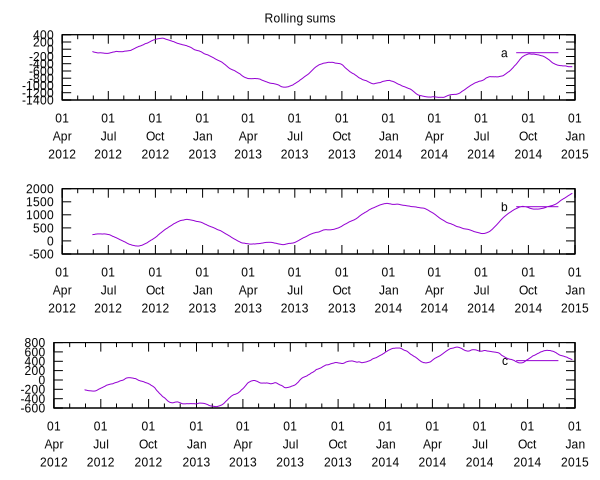

In [10]:
rs = df.rolling_sum(60)
plots = []
rs.each_vector_with_index do |vec,n|
  plots << GnuplotRB::Plot.new([vec, with: 'lines', title: n])
end

GnuplotRB::Multiplot.new(*plots, layout: [3,1], title: 'Rolling sums')